# Imports

In [41]:
import numpy
import scipy
import scipy.stats
import astropy 
import astropy.io
import astropy.io.ascii
import matplotlib.pyplot as plt
import Library_GraphTwoDimensionDensityColorMap


# Read in the data:

In [17]:
data = astropy.io.ascii.read( "RandomVariable_Generated_Data.astropydat" )
print ( data )

         A                     B            C 
-------------------- --------------------- ---
    2.34805892031837    2.7833044104717874 0.0
 -2.5367703345204946    -3.223129500167275 0.0
 0.07704929376485503     -6.53968302126885 0.0
  1.5609166237924597    4.0781308481517025 0.0
  1.3052908596160373     7.576748569392135 0.0
  1.1193454431794485     4.225939751821434 0.0
  1.3871657592678626   0.21699058961656836 0.0
  3.5879197155248357     2.856459401189608 0.0
  2.2391260230266217     4.076909882093242 0.0
 -0.5508589930363759   -3.4768902550146032 0.0
                 ...                   ... ...
-0.26076101489210135 -0.035201925545156776 1.0
  2.3964898528555807     4.951912206229972 1.0
  1.6241643616625412     2.981722255818159 1.0
   7.576964628217619    12.981054155548357 1.0
   6.823517840625555     4.368944239670143 1.0
    4.38582159851122     9.453776856768467 1.0
   7.416017504322749    11.673727118460208 1.0
  3.3289524948746987      -1.7267973470308 1.0
  1.877233282

# Some useful helper functions:

In [86]:
def plot_1D_function( 
    Functions = None,
    minp = None,
    maxp = None,
    nump = None,
    ):
    
       
    if None in [Functions, minp, maxp, nump]: 
        raise Exception("arg missing..." + str([Function, minp, maxp, nump]))
    
    for Function in Functions:

        TrialPoints = numpy.linspace(-20, 20, 100)
        Values = []
        for TrailPoint in TrialPoints:
            Values.append(Function ( TrailPoint) )

        plt.plot(TrialPoints, Values)
    
    
    
    return

# Marginal Distributions:

### Make a histogram of the data from column A

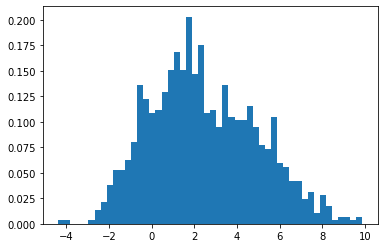

In [20]:
A = data['A']
plt.hist(A, density=True,bins=50)
plt.show()

### Make a histogram of the data from column B

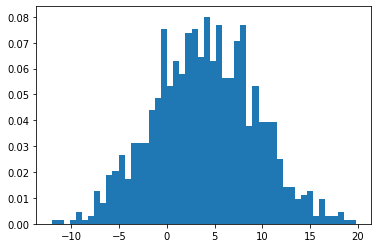

In [30]:
B = data['B']
plt.hist(B, density=True,bins=50)
plt.show()

### Approximate the data from column A as a univariate gaussian:

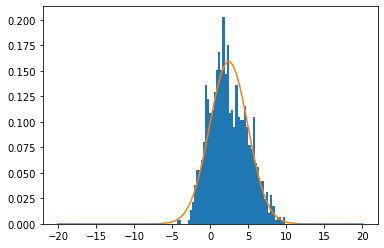

In [34]:
A_standard_deviation = numpy.sqrt( numpy.var( A ) )
A_mean = numpy.mean(A)

ATrialPoints = numpy.linspace(-20, 20, 100)
AValuePoints = scipy.stats.norm.pdf(TrialPoints, loc = A_mean, scale = A_standard_deviation )

plt.hist(A, density=True, bins=50)
plt.plot(ATrialPoints, AValuePoints)
plt.show()

### Approximate the data from column B as a univariate gaussian:

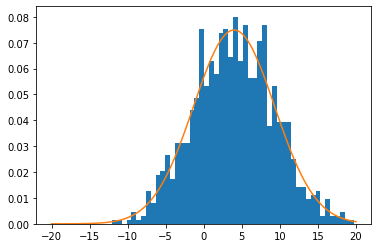

In [35]:
B_standard_deviation = numpy.sqrt( numpy.var( B ) )
B_mean = numpy.mean(B)

BTrialPoints = numpy.linspace(-20, 20, 100)
BValuePoints = scipy.stats.norm.pdf(TrialPoints, loc = B_mean, scale = B_standard_deviation )

plt.hist(B, density=True, bins=50)
plt.plot(BTrialPoints, BValuePoints)
plt.show()

# Conditional distributions

### (1) Approximate the joint probability density function of A and B with a multivariate gaussian


[[ 2.34805892  2.78330441]
 [-2.53677033 -3.2231295 ]
 [ 0.07704929 -6.53968302]
 ...
 [ 1.87723328  7.66747741]
 [ 3.86671506  1.16466627]
 [ 0.90569481  0.21260877]]
[2.43540487 3.99010759]
[[ 6.2656866   9.62672063]
 [ 9.62672063 28.35871884]]
0.01072841324533968
DomainMinimumPoint [ -5 -10]
DomainMaximumPoint [10 15]
PlugInPointsCount 10000
PointsToPlugInDataset.shape (10000, 2)
PointsToPlugInDataset[0] [ -5. -10.]
MaxObservedValue 0.017256781086649554
MinObservedValue 5.689694868972848e-15
Z.shape (100, 100)


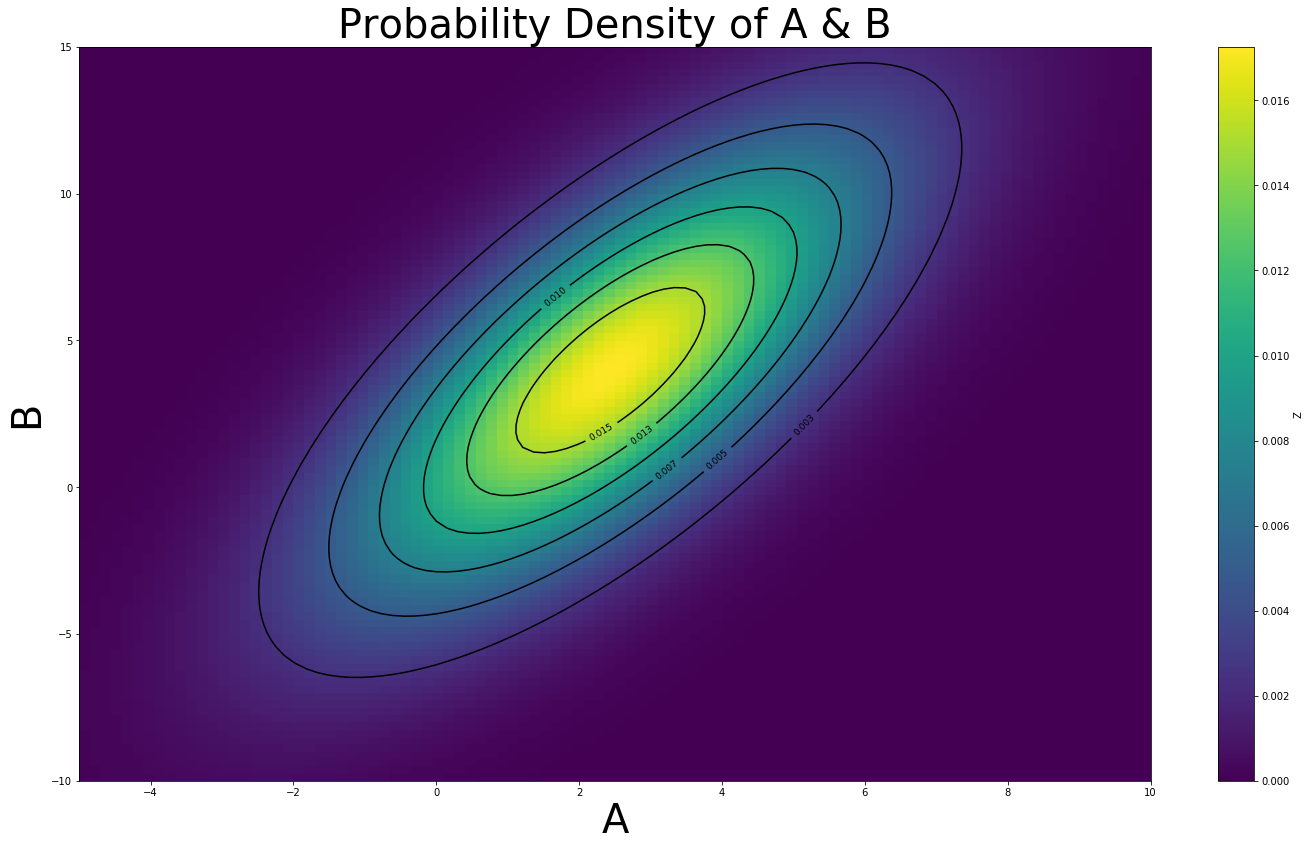

In [56]:

ABdata = numpy.vstack( ( data['A'], data['B'] ) ).T
print(ABdata)

ABMean = numpy.mean( ABdata, axis = 0 )
print (ABMean)

ABCovarianceMatrix = numpy.cov( ABdata, rowvar = False )
print (ABCovarianceMatrix)

def jointGaussian(ABpoint):
    return scipy.stats.multivariate_normal.pdf( ABpoint, ABMean, ABCovarianceMatrix )
print ( jointGaussian( [0,0]) )

Library_GraphTwoDimensionDensityColorMap.Main(
    Function = jointGaussian,
    DomainMinimumPoint  = numpy.array([-5, -10]),
    DomainMaximumPoint  = numpy.array([10, 15]),
    ShowContours = True,
    PrintExtra = False,
    )
plt.title("Probability Density of A & B", fontsize=40)
plt.ylabel('B',fontsize=40)
plt.xlabel('A',fontsize=40)
plt.draw()

### (1)  Fixing A = 0, plot the unnormalized probability density of B:


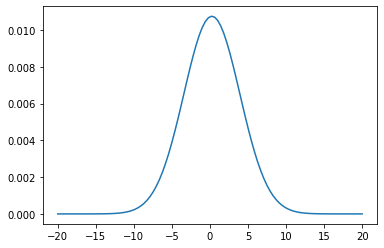

In [88]:
def BdensityConditionalOnA0_unnormalized(Bpoint):
    return jointGaussian( [0, Bpoint] )


plot_1D_function( 
    Functions = [BdensityConditionalOnA0_unnormalized],
    minp = -20,
    maxp = 20,
    nump = 100,
    )
plt.show()

### (1) Fixing A = 0, plot the normalized probability density function of B:


In [90]:
FullIntegrationResult = scipy.integrate.quad( 
    BdensityConditionalOnA0_unnormalized, 
    -100, 
    100, 
    full_output = False
    )[0]
print (FullIntegrationResult )

def BdensityConditionalOnA0_normalized(Bpoint):
    return BdensityConditionalOnA0_unnormalized(Bpoint) / FullIntegrationResult



0.09928205518980071


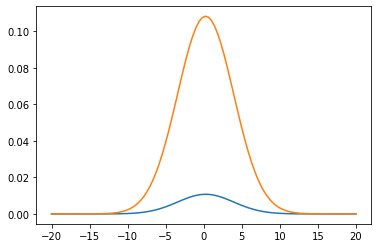

In [91]:
plot_1D_function( 
    Functions = [BdensityConditionalOnA0_unnormalized, BdensityConditionalOnA0_normalized],
    minp = -20,
    maxp = 20,
    nump = 100,
    )
plt.show()

### (1) Fixing A = 7, plot the probability density of B:


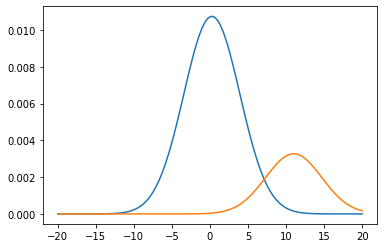

In [93]:
def BdensityConditionalOnA7_unormalized(Bpoint):
    return jointGaussian( [7, Bpoint] )

plot_1D_function( 
    Functions = [BdensityConditionalOnA0_unnormalized, BdensityConditionalOnA7_unormalized],
    minp = -20,
    maxp = 20,
    nump = 100,
    )
plt.show()

### (1) Fixing B = 0 plot the unnormalized probability density of A:


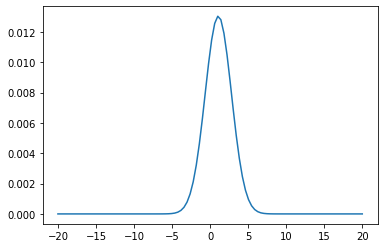

In [98]:
def AdensityConditionalOnB0_unnormalized(Apoint):
    return jointGaussian( [Apoint, 0] )


plot_1D_function( 
    Functions = [AdensityConditionalOnB0_unnormalized],
    minp = -20,
    maxp = 20,
    nump = 100,
    )
plt.show()

### (1) Fixing B = 7, plot the normalized probability density of A:


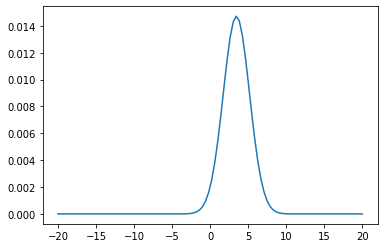

In [99]:
def AdensityConditionalOnB0_unnormalized(Apoint):
    return jointGaussian( [Apoint, 7] )


plot_1D_function( 
    Functions = [AdensityConditionalOnB0_unnormalized],
    minp = -20,
    maxp = 20,
    nump = 100,
    )
plt.show()